## Imports

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the path to the foldercontaining text files
folder_path = "C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\Raman"
filename = '240426_micro-Raman spectra of CZT (G.K-M.J samples).xlsx'
filetitle = filename.replace('.xlsx','')
file_path = os.path.join(folder_path, filename)

df = pd.read_excel(file_path, sheet_name = 'Data')

display(df)

,Wavenumber (cm-1),Ca,Cb,Da,Db,Ci,Cai,Cbi,Dai,Dbi
0,1805.562500,741.428345,148.285675,688.810852,68.562195,652.138062,1938.875000,2434.755127,3944.717773,1937.280518
1,1803.994141,723.889221,138.718857,709.538940,66.967720,655.327026,1926.119263,2539.989990,3817.160156,1961.197632
2,1802.427734,703.014893,153.037262,706.203186,65.359665,659.973206,1999.049194,2472.508301,3811.584229,1962.384033
3,1800.857422,734.744873,146.630219,688.524475,78.096527,627.959839,2000.227417,2526.183594,3887.294434,1869.535278
4,1799.289063,753.713806,140.225830,688.381287,74.893341,621.455383,1916.950806,2524.064941,3916.762207,1915.357300
...,...,...,...,...,...,...,...,...,...,...
1006,40.458984,17.797901,6.356393,11.441508,11.441508,5.085115,10.170230,17.797901,20.340460,17.797901
1007,38.492188,6.354871,3.812923,7.625845,13.980717,13.980717,11.438768,17.793640,19.064613,7.625845
1008,36.525391,17.789379,0.000000,12.706698,5.082680,15.248038,19.060049,15.248038,10.165359,11.436029
1009,34.556641,1.270366,7.622193,10.162925,11.433290,16.514753,13.974021,19.055483,20.325850,8.892559


In [ ]:
# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(5, 5), gridspec_kw={'height_ratios': [1, 1]})

# peak locations
CZTSe_large = {82:82, 173:173, 196:196, 240:'230-255', 328:328}
CZTSe_small = {82:82, 175:175, 198:198, 240:'235-246', 328:328}
CZTS = {297:297, 338:338}


# Add text annotations above the large line in ax1
for x, number in CZTS.items():
    closest_index = (CZTS_df['Large Raman Shift (cm-1)'] - x).abs().idxmin()
    closest_value = CZTS_df['Large Raman Shift (cm-1)'][closest_index]
    CZTS_offset = CZTS_df['Large Intensity'][closest_index] 
    ax1.text(closest_value, CZTS_offset + 2250, str(number), ha='center', va='bottom')
    ax1.text(closest_value, CZTS_offset - 750, str(number), ha='center', va='bottom')

# Add text annotations above the large line in ax1
for x, number in CZTSe_large.items():
    closest_index = (CZTSe_df['Large Raman Shift (cm-1)'] - x).abs().idxmin()
    closest_value = CZTSe_df['Large Raman Shift (cm-1)'][closest_index]
    CZTSe_large_offset = CZTSe_df['Large Intensity'][closest_index] 
    ax2.text(closest_value, CZTSe_large_offset + 8000, str(number), ha='center', va='bottom')
    
# Add text annotations above the large line in ax1
for x, number in CZTSe_small.items():
    closest_index = (CZTSe_df['Small Raman Shift (cm-1)'] - x).abs().idxmin()
    closest_value = CZTSe_df['Small Raman Shift (cm-1)'][closest_index]
    CZTSe_small_offset = CZTSe_df['Small Intensity'][closest_index] 
    ax2.text(closest_value, CZTSe_small_offset, str(number), ha='center', va='bottom')
    
# Plot the data from the 'Raw Data' sheet on the first subplot
ax1.plot(CZTS_df['Small Raman Shift (cm-1)'], CZTS_df['Small Intensity'] -2000, c='k', linewidth=0.8, label='Small')
#ax1.set_xlabel("Raman Shift (cm$^{-1}$)")
ax1.set_ylabel('Intensity (a.u.)')
ax1.set_yticklabels([])
ax1.set_xlim(100, 450)
ax1.set_ylim(0, 8000)
ax1.set_title('CZTS')
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.legend(fontsize='small')


# Plot the XRD reference pattern on the second subplot
ax2.plot(CZTSe_df['Small Raman Shift (cm-1)'], CZTSe_df['Small Intensity'], c='k', linewidth=0.8, label='Small')
ax2.plot(CZTSe_df['Large Raman Shift (cm-1)'], CZTSe_df['Large Intensity'] + 8000, c='r', linewidth=0.8, label='Large')
ax2.set_xlabel("Raman Shift (cm$^{-1}$)")
ax2.set_ylabel('Intensity (a.u.)')
ax2.set_title('CZTSSe')
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.legend(fontsize='small')
ax2.set_yticklabels([])
ax2.set_xlim(50, 350)
ax2.set_ylim(0,15000)

# Adjust spacing between subplots and set the height of the reference subplot
plt.subplots_adjust(hspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.9])

figure_title = 'Raman Large and Small CZTS and CZTSe'

plt.show()

save_dir = os.path.join(folder_path, 'Raman Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the plot as an image file
plt.savefig(os.path.join(save_dir, figure_title + '.png'), dpi=500)

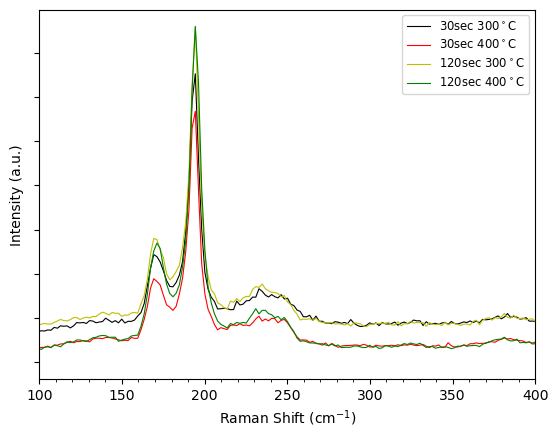

In [26]:
 # Create subplots with shared x-axis
fig, ax1 = plt.subplots()

# Plot the data from the 'Raw Data' sheet on the first subplot
ax1.plot(df['Wavenumber (cm-1)'], df['Ca'], c='k', linewidth=0.8, label='30sec 300$^\circ$C')
ax1.plot(df['Wavenumber (cm-1)'], df['Cb'], c='r', linewidth=0.8, label='30sec 400$^\circ$C')
ax1.plot(df['Wavenumber (cm-1)'], df['Da'], c='y', linewidth=0.8, label='120sec 300$^\circ$C')
ax1.plot(df['Wavenumber (cm-1)'], df['Db'], c='g', linewidth=0.8, label='120sec 400$^\circ$C')

ax1.set_xlabel("Raman Shift (cm$^{-1}$)")
ax1.set_ylabel('Intensity (a.u.)')
ax1.set_yticklabels([])
ax1.set_xlim(100, 400)
# ax1.set_ylim(400, 2000)
# ax1.set_title('CZTS')
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.legend(fontsize='small')

# Add text annotations above the large line in ax1
# for x, number in CZTS.items():
#     closest_index = (CZTS_df['Large Raman Shift (cm-1)'] - x).abs().idxmin()
#     closest_value = CZTS_df['Large Raman Shift (cm-1)'][closest_index]
#     CZTS_offset = CZTS_df['Large Intensity'][closest_index] 
#     ax1.text(closest_value, CZTS_offset + 2250, str(number), ha='center', va='bottom')
#     ax1.text(closest_value, CZTS_offset - 750, str(number), ha='center', va='bottom')
    

save_dir = os.path.join(folder_path, 'Raman Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the plot as an image file
plt.savefig(os.path.join(save_dir, filetitle + 'absorber cropped.png'), dpi=500)

In [ ]:
 # Create subplots with shared x-axis
fig, ax2 = plt.subplots()

# Plot the XRD reference pattern on the second subplot
ax2.plot(CZTSe_df['Small Raman Shift (cm-1)'], CZTSe_df['Small Intensity'], c='k', linewidth=0.8, label='Small')
ax2.plot(CZTSe_df['Large Raman Shift (cm-1)'], CZTSe_df['Large Intensity'] + 8000, c='r', linewidth=0.8, label='Large')
ax2.set_xlabel("Raman Shift (cm$^{-1}$)")
ax2.set_ylabel('Intensity (a.u.)')
ax2.set_title('CZTSSe')
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.legend(fontsize='small')
ax2.set_yticklabels([])
ax2.set_xlim(50, 350)
ax2.set_ylim(0,15000)

# Add text annotations above the large line in ax1
for x, number in CZTSe_large.items():
    closest_index = (CZTSe_df['Large Raman Shift (cm-1)'] - x).abs().idxmin()
    closest_value = CZTSe_df['Large Raman Shift (cm-1)'][closest_index]
    CZTSe_large_offset = CZTSe_df['Large Intensity'][closest_index] 
    ax2.text(closest_value, CZTSe_large_offset + 8000, str(number), ha='center', va='bottom')
    
# Add text annotations above the large line in ax1
for x, number in CZTSe_small.items():
    closest_index = (CZTSe_df['Small Raman Shift (cm-1)'] - x).abs().idxmin()
    closest_value = CZTSe_df['Small Raman Shift (cm-1)'][closest_index]
    CZTSe_small_offset = CZTSe_df['Small Intensity'][closest_index] 
    ax2.text(closest_value, CZTSe_small_offset, str(number), ha='center', va='bottom')
    
    save_dir = os.path.join(folder_path, 'Raman Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the plot as an image file
plt.savefig(os.path.join(save_dir, 'CZTSSe_Raman' + '.png'), dpi=500)